In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_data_1 = pd.read_csv(body)
df_data_1.head(10)



,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,American,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,American,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,American,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,American,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,American,amc ambassador dpl


# I. Exploring the Data

In [8]:
null = df_data_1.isna().describe()
null

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
count,406,406,406,406,406,406,406,406,406
unique,2,1,1,2,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,398,406,406,400,406,406,406,406,406


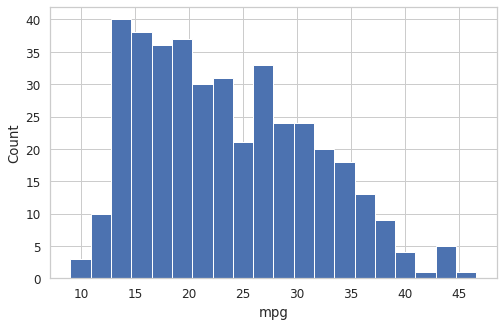

In [9]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_data_1['mpg'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='mpg', ylabel='Count');

In [18]:
noneff = df_data_1[df_data_1['mpg'] <= 23].shape[0]
eff = df_data_1[df_data_1['mpg'] > 23].shape[0]
print((noneff , eff))

(207, 191)


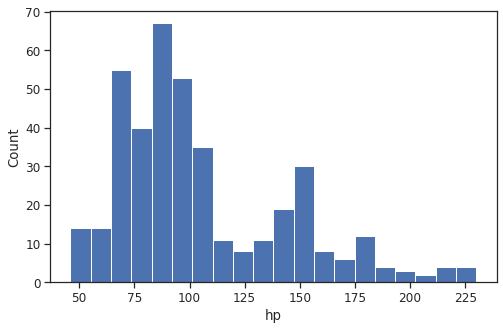

In [21]:
sns.set(style='ticks', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_data_1['horsepower'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='hp', ylabel='Count');

In [23]:
horse_missing = df_data_1[df_data_1["horsepower"].isna()]
horse_missing

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
28,25.0,4,98.0,NaN,2046,19.0,71,American,ford pinto
95,21.0,6,200.0,NaN,2875,17.0,74,American,ford maverick
220,23.6,4,140.0,NaN,2905,14.3,80,American,ford mustang cobra
241,23.0,4,151.0,NaN,3035,20.5,82,American,amc concord dl
317,40.9,4,85.0,NaN,1835,17.3,80,European,renault lecar deluxe
321,34.5,4,100.0,NaN,2320,15.8,81,European,renault 18i


In [29]:
df_data_1["horsepower"].fillna(df_data_1["horsepower"].mean(), inplace=True)

In [30]:
df_data_1.loc[220,"horsepower"]

105.0825

In [31]:
df_data_1.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,398.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182
std,7.815984,1.712160,104.922458,38.480531,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


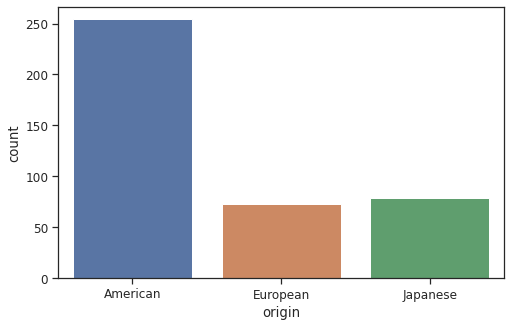

In [33]:
sns.countplot(df_data_1['origin'])

In [51]:
Amr = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="American"].shape[0]/eff
Europe = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="European"].shape[0]/eff
jap = df_data_1[df_data_1['mpg'] > 23][df_data_1["origin"]=="Japanese"].shape[0]/eff


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [52]:
print("propotion of American cars from overall efficient cars: " , Amr)
print("propotion of Europe cars from overall efficient cars: " , Europe)
print("propotion of Japan cars from overall efficient cars: " , jap)

propotion of American cars from overall efficient cars:  0.3612565445026178
propotion of Europe cars from overall efficient cars:  0.2774869109947644
propotion of Japan cars from overall efficient cars:  0.3612565445026178


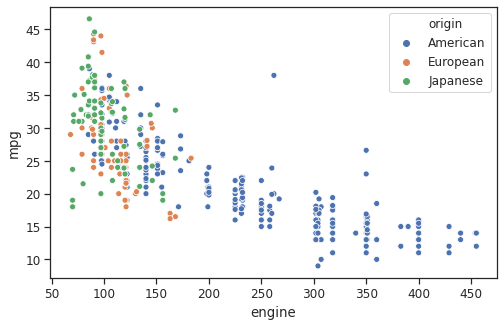

In [56]:
sns.scatterplot(data=df_data_1, x="engine", y="mpg", hue="origin")


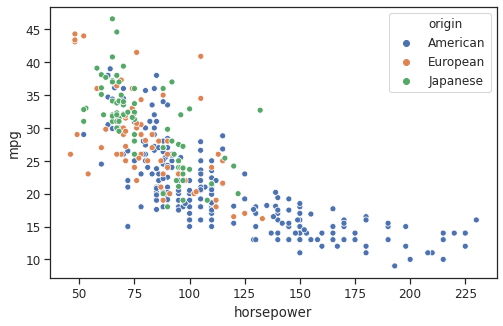

In [57]:
sns.scatterplot(data=df_data_1, x="horsepower", y="mpg", hue="origin")

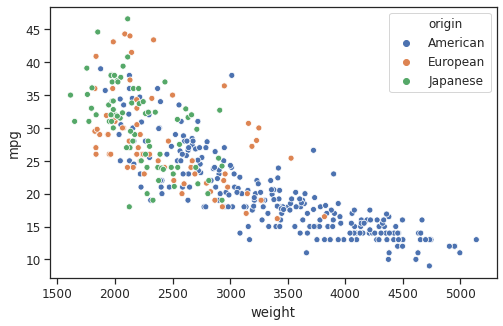

In [58]:
sns.scatterplot(data=df_data_1, x="weight", y="mpg", hue="origin")

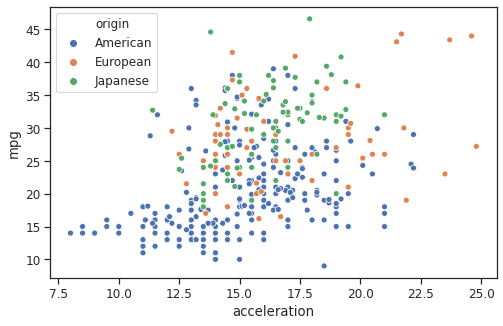

In [59]:
sns.scatterplot(data=df_data_1, x="acceleration", y="mpg", hue="origin")

# II. Feature Engineering

## 1. Define Target

In [60]:
df_data_1["mpg"].fillna(df_data_1["mpg"].mean(), inplace=True)

In [61]:
df_data_1["efficiency"] = 0

def efficient(n):
    if df_data_1.loc[n,"mpg"] > 23:
        df_data_1.loc[n,"efficiency"] = 1
        
for n in range(406):
    efficient(n)

In [62]:
df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1


In [65]:
df_data_1["efficiency"].value_counts()

0    207
1    199
Name: efficiency, dtype: int64

In [66]:
df_data_1["mpg"].mean()

23.514572864321604

## 2. Format predictive columns

In [67]:
df_data_1["cylinders"].value_counts()

4    207
8    108
6     84
3      4
5      3
Name: cylinders, dtype: int64

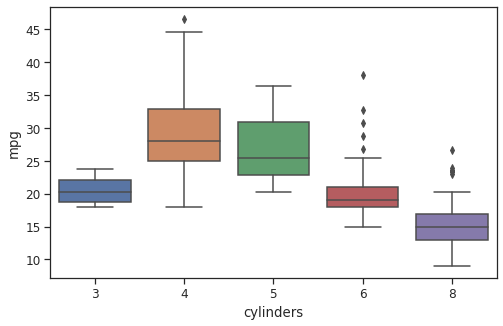

In [68]:
 sns.boxplot(x='cylinders', y='mpg', data=df_data_1)

In [69]:
mapper = {4:5, 5:4, 3:3, 6:2, 8:1}

df_data_1["cyli"]=df_data_1["cylinders"].map(mapper)

df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency,cyli
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0,1
...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1,5
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1,5
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1,5
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1,5


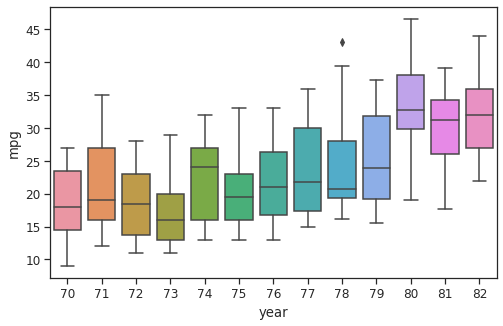

In [70]:
 sns.boxplot(x='year', y='mpg', data=df_data_1)

In [73]:
df_data_1["date"] = df_data_1["year"] - min(df_data_1["year"]) + 1

In [74]:
df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency,cyli,date
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1,5,13
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1,5,13
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1,5,13
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1,5,13


In [84]:
import sklearn
from sklearn.preprocessing import *

In [87]:
minmax = sklearn.preprocessing.MinMaxScaler()

df_data_1["normalized_engine"] = pd.DataFrame(minmax.fit_transform(df_data_1[["engine"]]))
df_data_1["normalized_horsepower"] = pd.DataFrame(minmax.fit_transform(df_data_1[["horsepower"]]))
df_data_1["normalized_weight"] = pd.DataFrame(minmax.fit_transform(df_data_1[["weight"]]))

df_data_1

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0,1,1,0.617571,0.456522,0.536150
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0,1,1,0.728682,0.646739,0.589736
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0,1,1,0.645995,0.565217,0.516870
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0,1,1,0.609819,0.565217,0.516019
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0,1,1,0.604651,0.510870,0.520556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,Japanese,toyota corolla,1,5,13,0.103359,0.130435,0.179189
402,38.0,4,91.0,67.0,1965,15.0,82,Japanese,honda civic,1,5,13,0.059432,0.114130,0.099802
403,32.0,4,91.0,67.0,1965,15.7,82,Japanese,honda civic (auto),1,5,13,0.059432,0.114130,0.099802
404,38.0,4,91.0,67.0,1995,16.2,82,Japanese,datsun 310 gx,1,5,13,0.059432,0.114130,0.108307


In [88]:
dataset = pd.get_dummies(df_data_1, columns=['origin'])

In [89]:
dataset

,mpg,cylinders,engine,horsepower,weight,acceleration,year,name,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight,origin_American,origin_European,origin_Japanese
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,1,1,0.617571,0.456522,0.536150,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,1,1,0.728682,0.646739,0.589736,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,1,1,0.645995,0.565217,0.516870,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,1,1,0.609819,0.565217,0.516019,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,1,1,0.604651,0.510870,0.520556,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,34.0,4,108.0,70.0,2245,16.9,82,toyota corolla,1,5,13,0.103359,0.130435,0.179189,0,0,1
402,38.0,4,91.0,67.0,1965,15.0,82,honda civic,1,5,13,0.059432,0.114130,0.099802,0,0,1
403,32.0,4,91.0,67.0,1965,15.7,82,honda civic (auto),1,5,13,0.059432,0.114130,0.099802,0,0,1
404,38.0,4,91.0,67.0,1995,16.2,82,datsun 310 gx,1,5,13,0.059432,0.114130,0.108307,0,0,1


In [91]:
dataset = dataset.iloc[:,8:]
dataset

,efficiency,cyli,date,normalized_engine,normalized_horsepower,normalized_weight,origin_American,origin_European,origin_Japanese
0,0,1,1,0.617571,0.456522,0.536150,1,0,0
1,0,1,1,0.728682,0.646739,0.589736,1,0,0
2,0,1,1,0.645995,0.565217,0.516870,1,0,0
3,0,1,1,0.609819,0.565217,0.516019,1,0,0
4,0,1,1,0.604651,0.510870,0.520556,1,0,0
...,...,...,...,...,...,...,...,...,...
401,1,5,13,0.103359,0.130435,0.179189,0,0,1
402,1,5,13,0.059432,0.114130,0.099802,0,0,1
403,1,5,13,0.059432,0.114130,0.099802,0,0,1
404,1,5,13,0.059432,0.114130,0.108307,0,0,1


# III. Model Selection

## 1. Decision Trees

In [92]:
all_classes = dataset["efficiency"]
all_inputs = dataset.iloc[:,1:]

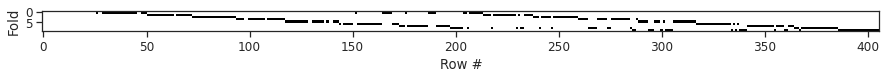

In [93]:
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_classes)

Text(0.5, 1.0, 'Average score: 0.7828048780487804')

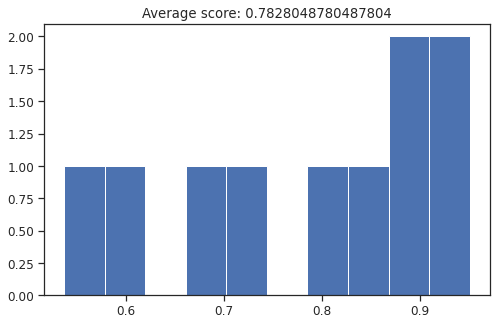

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [96]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9014634146341463
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'splitter': 'best'}


In [97]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=2, max_features=1)

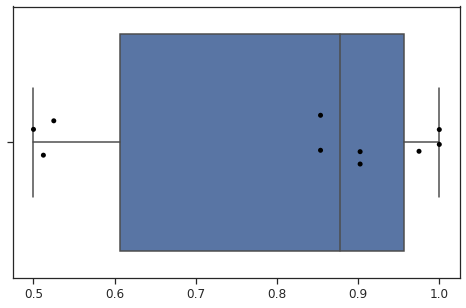

In [99]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

## 2. Random Forests

In [100]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.8491463414634147
Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 25}


RandomForestClassifier(max_features=2, n_estimators=25)

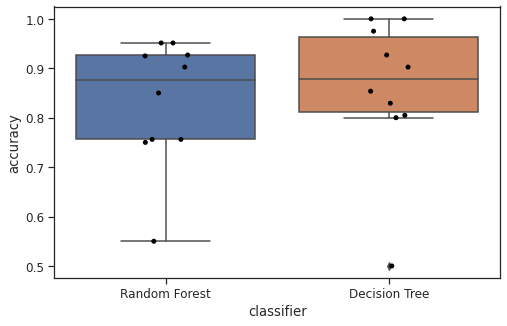

In [101]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

## logistic regression

Best score: 0.8766463414634146
Best parameters: {'C': 0.1, 'solver': 'newton-cg'}


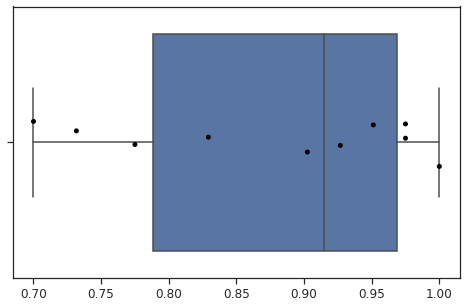

In [102]:
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()

parameter_grid = {'C': [1.0, 2.0, 0.5, 0.01,0.1],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                  }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(logistic_regression_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


logistic_regression_classifier = grid_search.best_estimator_
logistic_regression_classifier

dt_scores = cross_val_score(logistic_regression_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

# Gaussian Process Classifier

Best score: 0.803170731707317
Best parameters: {'warm_start': True}


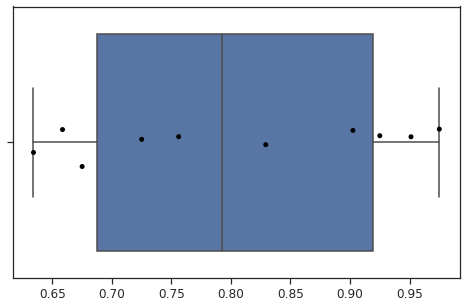

In [104]:
from sklearn.gaussian_process import GaussianProcessClassifier

gaussian_process_classifier = GaussianProcessClassifier()

parameter_grid = {'warm_start': [True, False]
                  }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(gaussian_process_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


gaussian_process_classifier = grid_search.best_estimator_
gaussian_process_classifier

dt_scores = cross_val_score(gaussian_process_classifier, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;

## XGBoost

Best score: 0.8765243902439023
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}


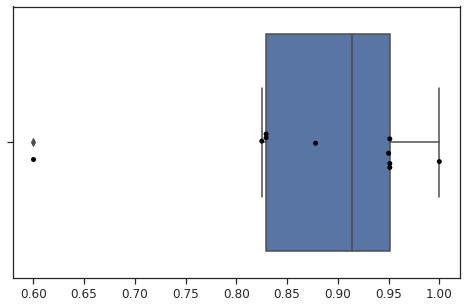

In [105]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

parameter_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
                  }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(xgb,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


xgb = grid_search.best_estimator_
xgb

dt_scores = cross_val_score(xgb, all_inputs, all_classes, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black') ;